Potential Other Questions: Can we determine position type based on weight or other statistics?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17172 entries, 0 to 17171
Data columns (total 16 columns):
Age                     13504 non-null float64
Birth Place             14794 non-null object
Birthday                16835 non-null object
College                 17133 non-null object
Current Status          17172 non-null object
Current Team            17172 non-null object
Experience              17133 non-null object
Height (inches)         17026 non-null float64
High School             2514 non-null object
High School Location    2510 non-null object
Name                    17172 non-null object
Number                  1708 non-null float64
Player Id               17172 non-null object
Position                17172 non-null object
Weight (lbs)            17121 non-null float64
Years Played            17172 non-null object
dtypes: float64(4), object(12)
memory usage: 2.1+ MB
None 


Correlations:
                   Height (inches)  Weight (lbs)
Height (inches)         1.0000

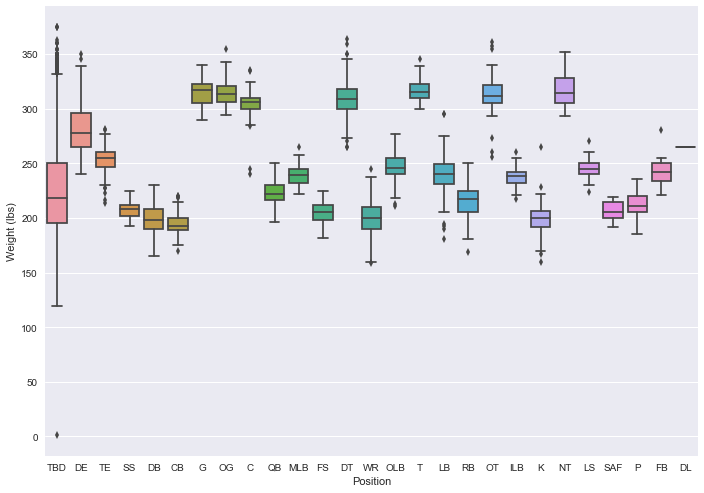

In [21]:

%matplotlib inline
import matplotlib.pyplot as plt
import urllib2
import urllib
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import json
import re
import seaborn as sns

#All active players don't have "years played" information -> set values to "Active"
#All retired players don't have "current team" information -> set values to "Retired"
#All retired players don't have "Position" information -> set values to "TBD"
    #These positions will have to be updated based on crossreferencing with the other .csv statistics files
Basic_Stats = pd.read_csv("./Basic_Stats.csv");
Basic_Stats = pd.DataFrame(data = Basic_Stats)
Basic_Stats['Current Team'].replace(np.nan,'Retired', inplace=True);
Basic_Stats['Years Played'].replace(np.nan,'Active', inplace=True);
Basic_Stats['Position'].replace(np.nan,'TBD', inplace=True);
print Basic_Stats.info(), "\n\n"

#Delete sparse data 
Basic_Stats = Basic_Stats.drop(['Number'], axis=1)
Basic_Stats = Basic_Stats.drop(['High School'], axis=1)
Basic_Stats = Basic_Stats.drop(['High School Location'], axis=1)
Basic_Stats = Basic_Stats.drop(['Age'], axis=1)
Basic_Stats = Basic_Stats.dropna(axis = 0, how="any")

#################
##  TODO: Need to find way to correlate discrete data objects
#################
print "Correlations:\n ",Basic_Stats.corr(method='pearson'), "\n\n"

#Box plot of Weight ranges for each position
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x="Position", y="Weight (lbs)", data=Basic_Stats);

print Basic_Stats.info(), "\n\n"
  